<a href="https://colab.research.google.com/github/andhikaaria/MachineLearning/blob/main/mgg2/Polynomial_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Andhika Aria Pratama Nugraha
#1103202121
#Tugas ke mgg2
#Menghubungkan dengan drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd #import library

# Ganti path dengan lokasi dataset CSV di Google Drive Anda
path_to_dataset = '/content/drive/My Drive/Dataset/EconomiesOfScale.csv'

# Membaca dataset CSV
df = pd.read_csv(path_to_dataset)

# Menampilkan beberapa baris pertama dari dataset
print(df.head())


   Number of Units  Manufacturing Cost
0         1.000000           95.066056
1         1.185994           96.531750
2         1.191499           73.661311
3         1.204771           95.566843
4         1.298773           98.777013


In [12]:
df.head(20) #menampilkan 20 baris atas

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
5,1.307435,100.000000
6,1.339386,94.759756
7,1.379044,67.185383
8,1.420000,72.886041
9,1.473948,61.967696


In [13]:
df.info() #menampilkan informasi isi dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [14]:
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


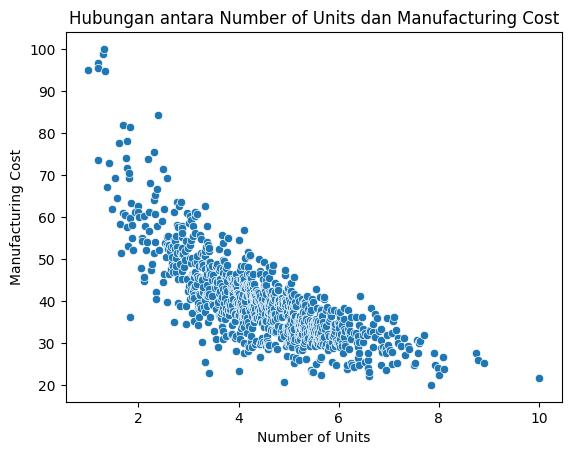

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
#memvisualisasi variabel x dan y
sns.scatterplot(data=df, x="Number of Units", y="Manufacturing Cost")

plt.title("Hubungan antara Number of Units dan Manufacturing Cost")
plt.xlabel("Number of Units")
plt.ylabel("Manufacturing Cost")

plt.show()

In [16]:
# Menggunakan kolom "Number of Units" sebagai variabel independen (X)
X = df[["Number of Units"]]

# Menggunakan kolom "Manufacturing Cost" sebagai variabel dependen (y)
y = df["Manufacturing Cost"]


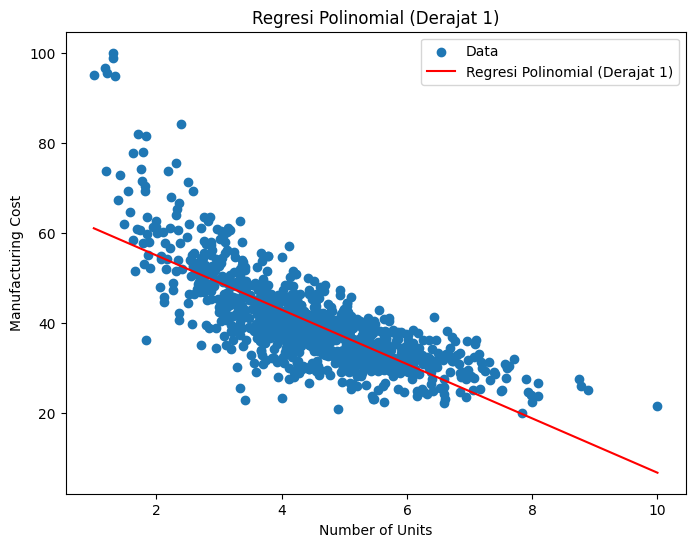

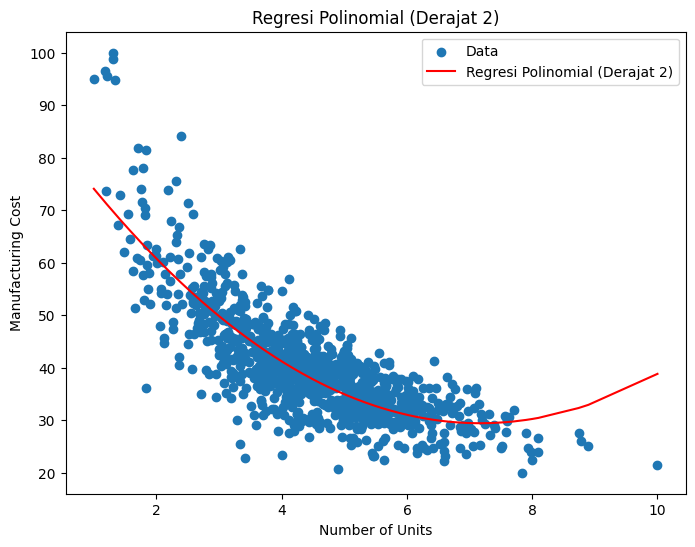

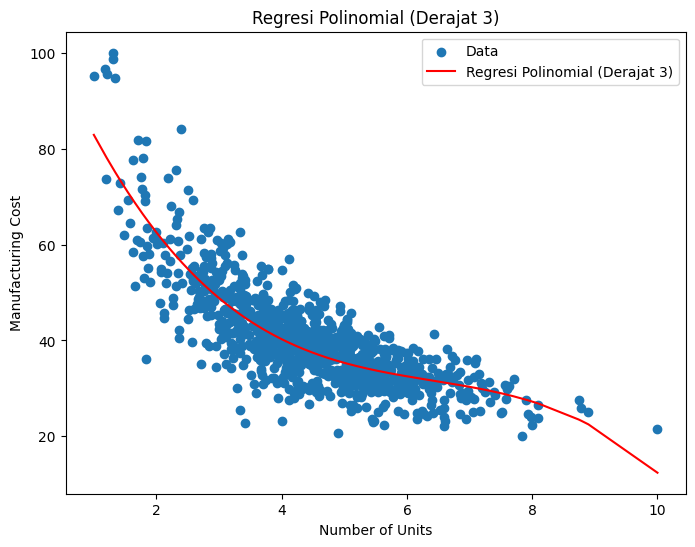

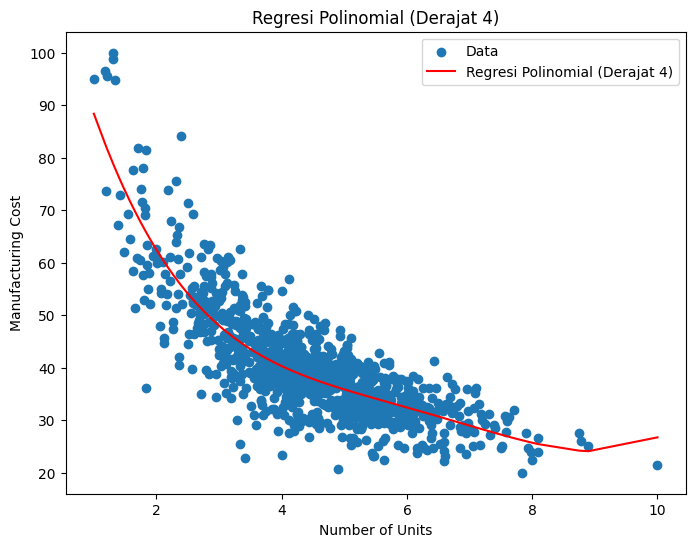

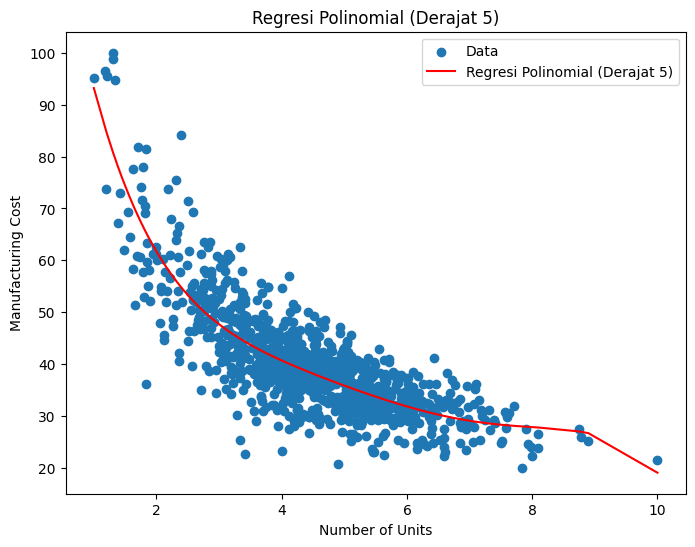

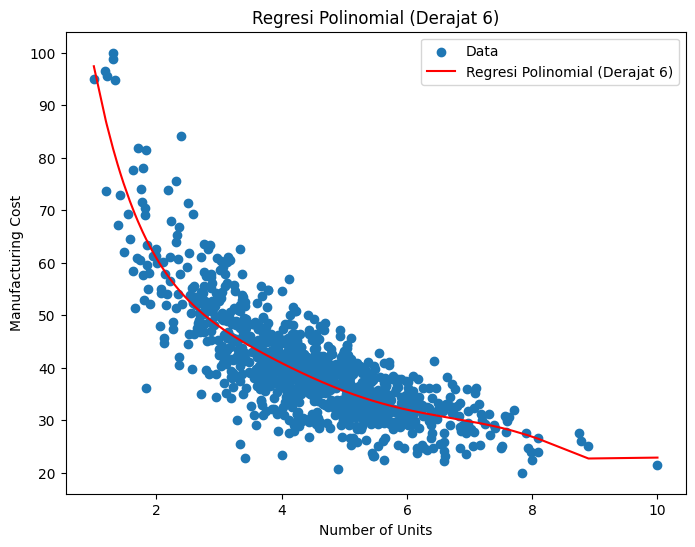

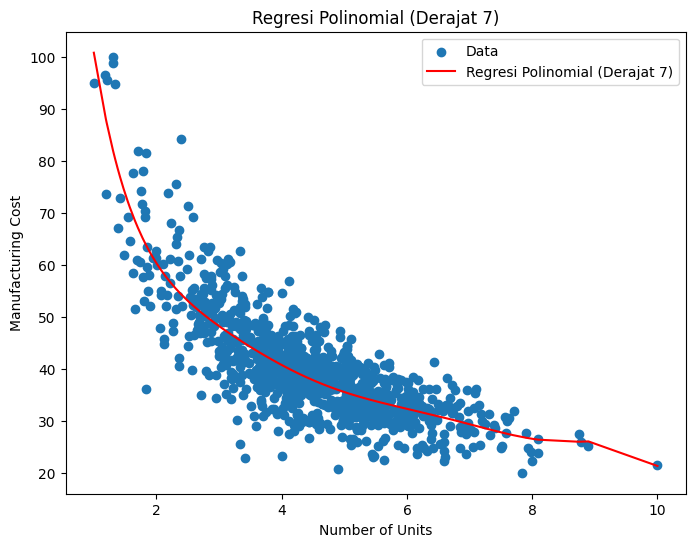

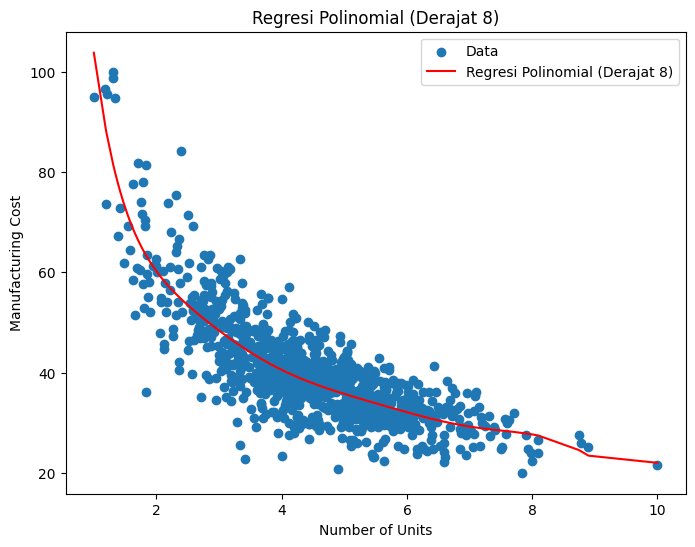

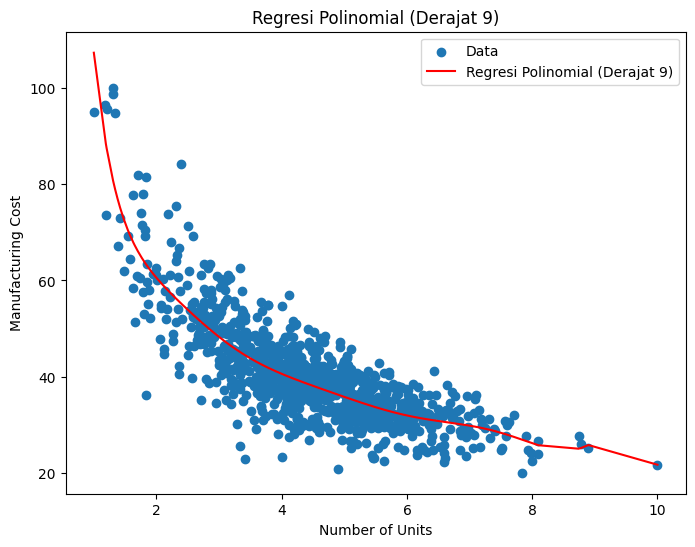

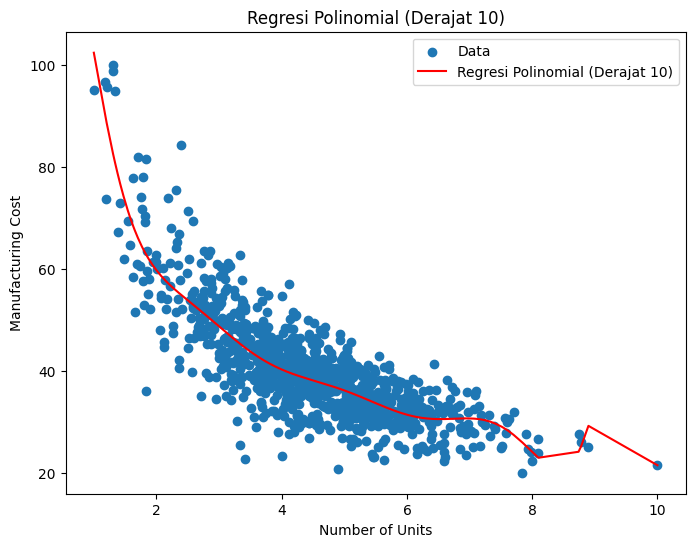

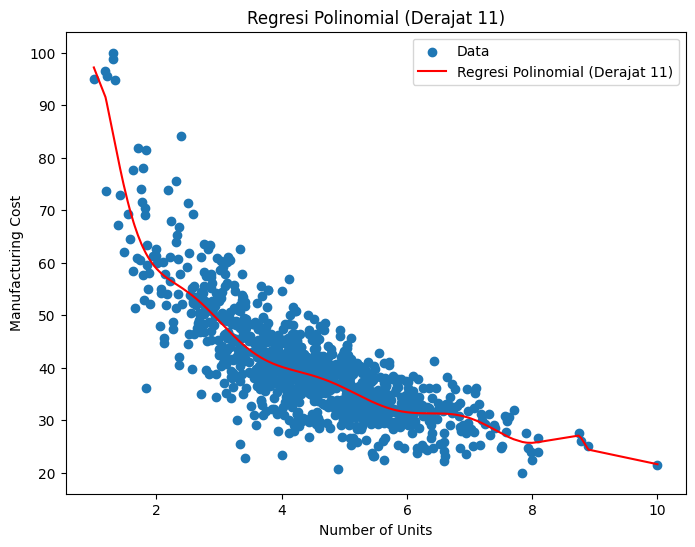

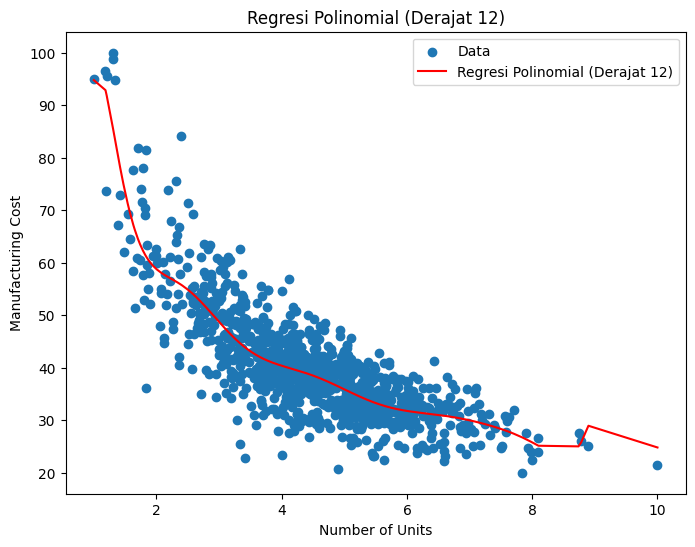

Derajat 1 MSE: 47.22
Derajat 2 MSE: 37.57
Derajat 3 MSE: 35.07
Derajat 4 MSE: 34.41
Derajat 5 MSE: 34.08
Derajat 6 MSE: 33.89
Derajat 7 MSE: 33.78
Derajat 8 MSE: 33.70
Derajat 9 MSE: 33.61
Derajat 10 MSE: 33.41
Derajat 11 MSE: 33.13
Derajat 12 MSE: 33.05


In [9]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Menggunakan kolom "Number of Units" sebagai variabel independen (X)
X = df[["Number of Units"]]

# Menggunakan kolom "Manufacturing Cost" sebagai variabel dependen (y)
y = df["Manufacturing Cost"]

# Membuat array untuk menyimpan hasil MSE untuk setiap derajat polinomial
mse_values = []

# Mencoba derajat polinomial dari 1 hingga 8
for degree in range(1, 13):
    # Mengubah fitur menjadi bentuk polinomial
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Membuat model regresi linier
    model = LinearRegression()
    model.fit(X_poly, y)

    # Melakukan prediksi menggunakan model
    y_pred = model.predict(X_poly)

    # Menghitung Mean Squared Error (MSE)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Plot hasil regresi polinomial
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Data')
    plt.plot(X, y_pred, label='Regresi Polinomial (Derajat {})'.format(degree), color='red')
    plt.title('Regresi Polinomial (Derajat {})'.format(degree))
    plt.xlabel('Number of Units')
    plt.ylabel('Manufacturing Cost')
    plt.legend()
    plt.show()

# Menampilkan nilai MSE untuk setiap derajat polinomial
for degree, mse in enumerate(mse_values, start=1):
    print(f'Derajat {degree} MSE: {mse:.2f}')
